In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import missingno as msno

In [191]:
df=pd.read_csv('heart_disease_dataset.csv',sep=';')


In [192]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [194]:
df.duplicated().sum()

1

In [195]:
df.drop_duplicates(inplace=True)

In [196]:
df.duplicated().sum()

0

<AxesSubplot:>

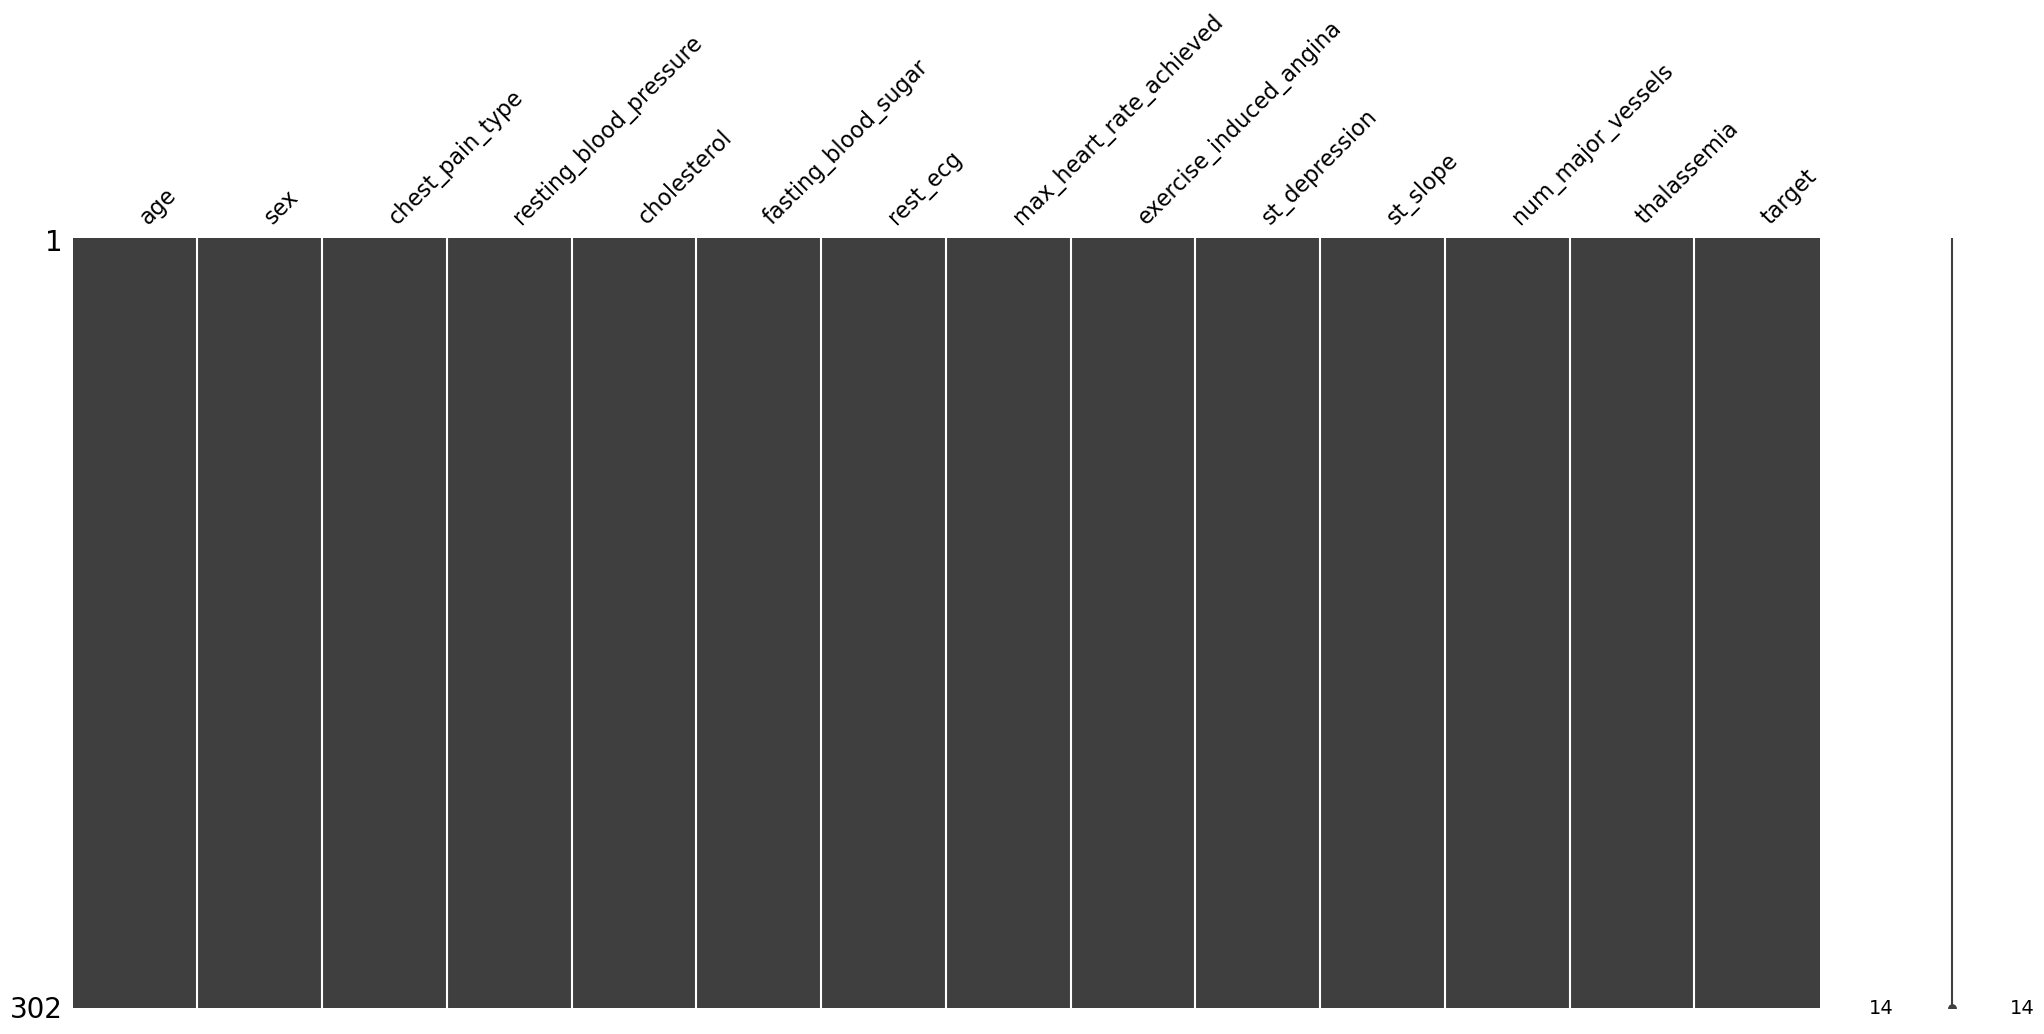

In [197]:
msno.matrix(df)

<AxesSubplot:>

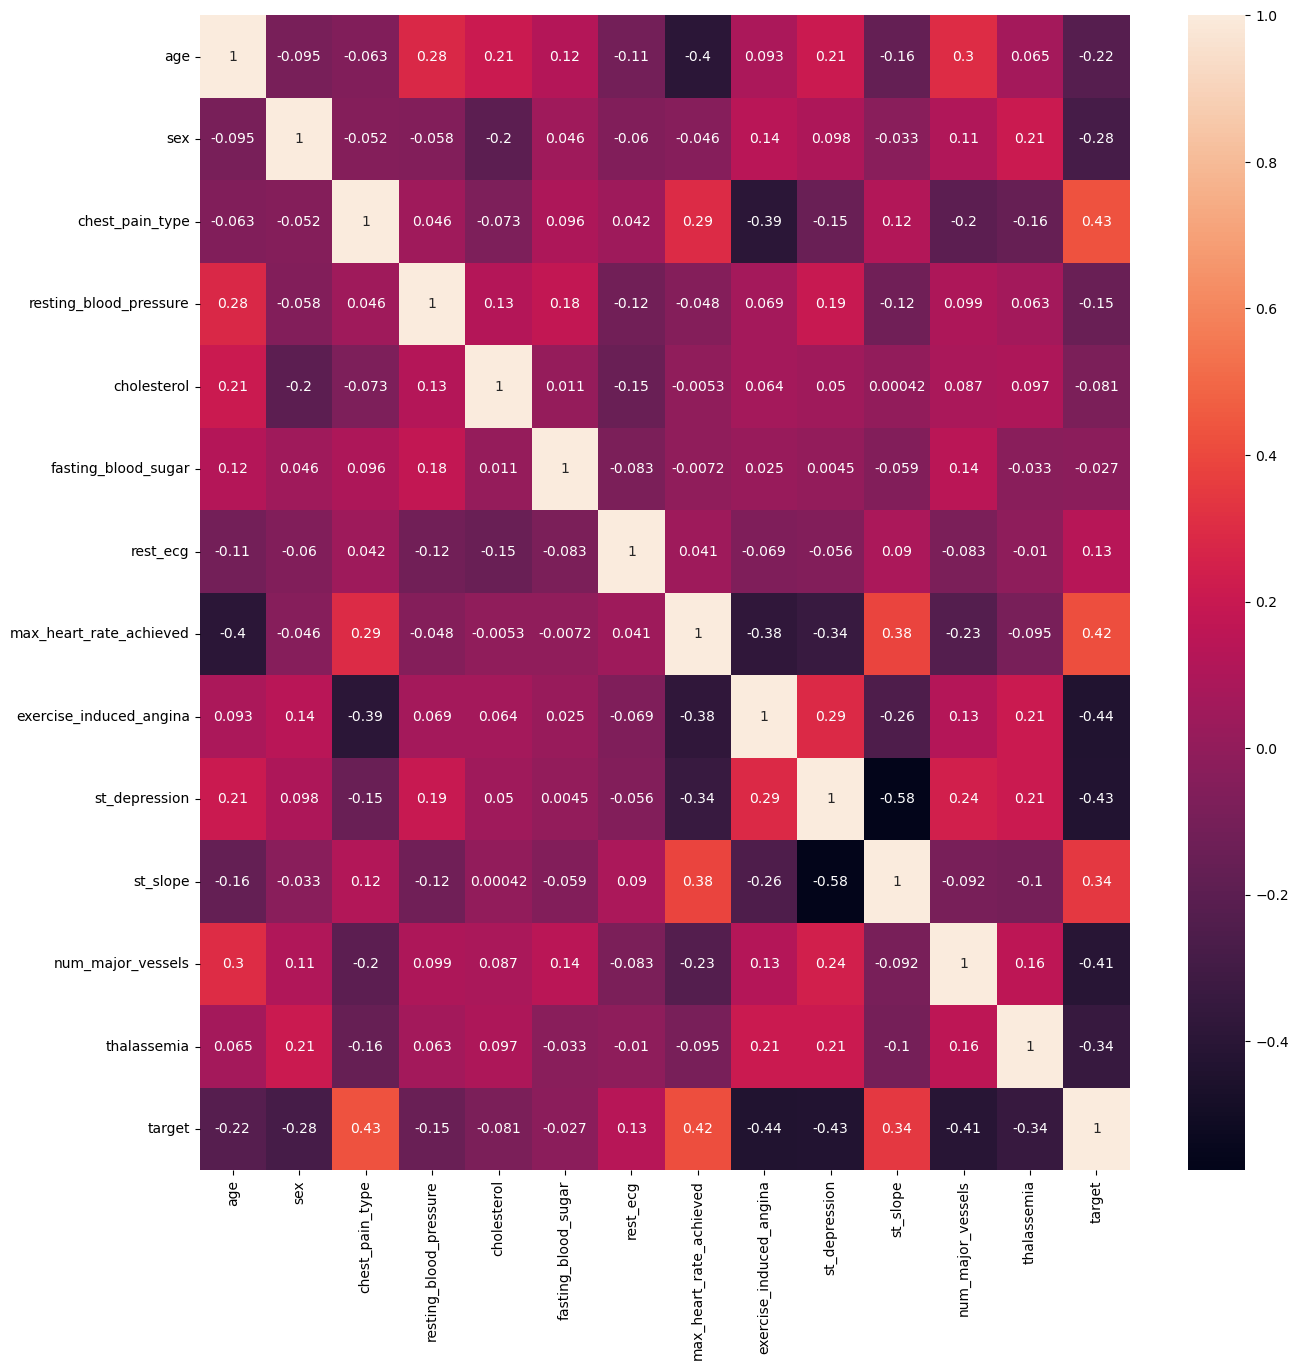

In [198]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [199]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [200]:
y = np.array(df.target)
X=df.drop('target',axis=1)

In [201]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [202]:
from sklearn.model_selection import train_test_split 

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.24,stratify=y,shuffle=True,random_state=42)

In [204]:
#DL

In [205]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader

In [206]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [207]:
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

In [208]:
train_loader = DataLoader(train_dataset,batch_size=20,shuffle=True)
test_loader = DataLoader(test_dataset,shuffle=True)

In [209]:
X_train.size()

torch.Size([229, 13])

In [210]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        
        self.fc1 = nn.Linear(13,6)
        self.fc2 = nn.Linear(6,4)
        self.out = nn.Linear(4,1)

    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.tanh(self.fc2(X))
        X = self.out(X)
        return X

In [211]:
#burada gorunduyu kimi 13 feature,2 hidden layer(birinde 6 birinde 4 neuron olmaqla),1 output movcuddur

In [212]:
model = Model()

In [213]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [214]:
get_n_params(model) #117 wb movcuddur

117

In [215]:
#defining paramtres
num_epochs = 20
lr_rate = 0.03
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(),lr=lr_rate)

In [216]:
# creating a supporting function
def binary_acc(y_pred,y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    
    correct_results_sum = (y_pred_tag==y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc*100)
    return acc

In [217]:
model.train()
for e in range(1,num_epochs+1):
    epoch_loss = 0
    epoch_acc = 0 
    for X_batch,y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
       
        
        loss = criterion(y_pred.flatten(),y_batch.flatten().float())
        acc = binary_acc(y_pred.flatten(),y_batch.flatten().float())
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print(f'Epoch: {e+0:03}: |Loss:{epoch_loss/len(train_loader):.5f}|Acc: {epoch_acc/len(train_loader):.3f}')

Epoch: 001: |Loss:0.69844|Acc: 42.667
Epoch: 002: |Loss:0.69236|Acc: 47.750
Epoch: 003: |Loss:0.69007|Acc: 49.333
Epoch: 004: |Loss:0.68842|Acc: 53.417
Epoch: 005: |Loss:0.68525|Acc: 58.000
Epoch: 006: |Loss:0.68261|Acc: 66.333
Epoch: 007: |Loss:0.67940|Acc: 73.333
Epoch: 008: |Loss:0.67650|Acc: 72.667
Epoch: 009: |Loss:0.67303|Acc: 75.417
Epoch: 010: |Loss:0.67011|Acc: 70.667
Epoch: 011: |Loss:0.66902|Acc: 64.750
Epoch: 012: |Loss:0.66449|Acc: 65.917
Epoch: 013: |Loss:0.66046|Acc: 67.667
Epoch: 014: |Loss:0.65615|Acc: 69.417
Epoch: 015: |Loss:0.65186|Acc: 73.250
Epoch: 016: |Loss:0.64810|Acc: 70.500
Epoch: 017: |Loss:0.63847|Acc: 73.667
Epoch: 018: |Loss:0.63324|Acc: 74.917
Epoch: 019: |Loss:0.62384|Acc: 75.667
Epoch: 020: |Loss:0.61742|Acc: 75.583


In [218]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        torch.no_grad()
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.numpy())

y_pred_list = [a.squeeze().tolist() for  a in  y_pred_list]

In [219]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [220]:
print(confusion_matrix(y_test,y_pred_list))

[[ 9 24]
 [ 9 31]]


In [221]:
print(classification_report(y_test,y_pred_list))

              precision    recall  f1-score   support

         0.0       0.50      0.27      0.35        33
         1.0       0.56      0.78      0.65        40

    accuracy                           0.55        73
   macro avg       0.53      0.52      0.50        73
weighted avg       0.53      0.55      0.52        73



In [222]:
#indi acc func ve bezi parametrleri deyisek

In [223]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        
        self.fc1 = nn.Linear(13,6)
        self.fc2 = nn.Linear(6,4)
        self.out = nn.Linear(4,1)

    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.out(X)
        return X

In [224]:
#defining paramtres
num_epochs = 20
lr_rate = 0.03
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(),lr=lr_rate)

In [225]:
model.train()
for e in range(1,num_epochs+1):
    epoch_loss = 0
    epoch_acc = 0 
    for X_batch,y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
       
        
        loss = criterion(y_pred.flatten(),y_batch.flatten().float())
        acc = binary_acc(y_pred.flatten(),y_batch.flatten().float())
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print(f'Epoch: {e+0:03}: |Loss:{epoch_loss/len(train_loader):.5f}|Acc: {epoch_acc/len(train_loader):.3f}')

Epoch: 001: |Loss:0.60682|Acc: 77.000
Epoch: 002: |Loss:0.59449|Acc: 78.583
Epoch: 003: |Loss:0.58858|Acc: 78.500
Epoch: 004: |Loss:0.57294|Acc: 80.750
Epoch: 005: |Loss:0.55955|Acc: 81.417
Epoch: 006: |Loss:0.54569|Acc: 83.333
Epoch: 007: |Loss:0.53257|Acc: 81.917
Epoch: 008: |Loss:0.51917|Acc: 82.667
Epoch: 009: |Loss:0.49967|Acc: 84.167
Epoch: 010: |Loss:0.48568|Acc: 85.833
Epoch: 011: |Loss:0.47992|Acc: 84.833
Epoch: 012: |Loss:0.46177|Acc: 85.333
Epoch: 013: |Loss:0.45529|Acc: 84.833
Epoch: 014: |Loss:0.44558|Acc: 84.833
Epoch: 015: |Loss:0.42802|Acc: 85.333
Epoch: 016: |Loss:0.41827|Acc: 84.833
Epoch: 017: |Loss:0.40869|Acc: 85.333
Epoch: 018: |Loss:0.40460|Acc: 85.750
Epoch: 019: |Loss:0.39708|Acc: 85.333
Epoch: 020: |Loss:0.39505|Acc: 85.333


In [226]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        torch.no_grad()
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.numpy())

y_pred_list = [a.squeeze().tolist() for  a in  y_pred_list]

In [227]:
print(confusion_matrix(y_test,y_pred_list))

[[14 19]
 [10 30]]


In [228]:
print(classification_report(y_test,y_pred_list))

              precision    recall  f1-score   support

         0.0       0.58      0.42      0.49        33
         1.0       0.61      0.75      0.67        40

    accuracy                           0.60        73
   macro avg       0.60      0.59      0.58        73
weighted avg       0.60      0.60      0.59        73

